In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.757877998350573 -64.37845707843435
-71.70275594512157 25.107710614327146
-74.67571521791201 -155.67454633425217
51.86920980768306 -91.20192077755507
-46.91506246681472 -71.02723728197543
53.79279820233654 -165.6124833509629
-13.326623523241707 37.26189376141937
54.48708846952158 -157.27363286479277
61.52976168149965 30.702740662483194
-4.142038473362106 147.64879427130472
-38.58706816578317 -72.53088255521861
27.825073319469382 38.11580403800684
42.7171110523978 -128.3817537831662
-77.85297425263164 103.45280619011771
13.370830252674367 78.37304418355689
-36.69124098719532 -98.42649869535754
-53.97695639230578 122.28130255164979
79.78156239117257 -52.27793489023486
-11.964581052306968 52.87935388684474
-24.14863729114292 95.1603820909088
-68.61687813552385 58.162386968653294
35.35109816124934 -100.86024102262039
-55.8890759492831 -132.33661113600337
-38.40770229850832 69.13377056143727
-85.62894315384511 21.70919633621574
-60.45936194863772 -131.875186363186
65.47131054044866 64.59

45.227831321817405 159.879859306392
17.506809840609876 36.06085628396704
59.331623063945955 -178.95330177721004
86.49025917496323 -27.859188573605934
35.4191216986719 -121.6203269718956
-28.754877545332107 16.440777246076323
-33.70892754016326 141.01468255267355
59.48851194342194 -74.24815549584557
-33.76360766323182 -43.38084352789838
23.14537023235856 -5.8154388859278185
-0.21034594848480026 -168.97303324948282
-30.653253600339205 152.04106529138954
79.41866800320281 11.086997379342108
48.18677494555297 127.42286919331059
-26.263862738469875 109.91244434677282
0.7819494296388854 103.82656317694904
58.01702745263111 -155.81400891125256
86.39100355504218 -70.0316287014174
-24.694692812857113 62.05384847398926
59.277443100806636 119.10678696289546
36.38777448712267 15.825280767681448
-58.74027456791511 117.46281343977762
-12.771799287170126 -17.512194964721232
-1.4869503660894736 132.22035436909107
4.755998601435124 -130.29938549580177


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santiago del estero
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | cuamba
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | sortavala
Processing Record 10 of Set 1 | madang
Processing Record 11 of Set 1 | lautaro
Processing Record 12 of Set 1 | tabuk
Processing Record 13 of Set 1 | coos bay
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | srinivaspur
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | sambava
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | pampa
Processing Record 22 of Set 1 | rikitea
Processing Record

Processing Record 38 of Set 4 | jackson
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | belmonte
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | mandan
Processing Record 45 of Set 4 | majene
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | kuche
City not found. Skipping...
Processing Record 50 of Set 4 | evensk
Processing Record 1 of Set 5 | puerto escondido
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | bonavista
Processing Record 5 of Set 5 | dauphin
Processing Record 6 of Set 5 | kusk
City not found. Skipping...
Processing Record 7 of Set 5 | oistins
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 5 | bengk

Processing Record 24 of Set 8 | tessalit
Processing Record 25 of Set 8 | niamey
Processing Record 26 of Set 8 | salinopolis
Processing Record 27 of Set 8 | castro
Processing Record 28 of Set 8 | midyat
Processing Record 29 of Set 8 | lumphat
Processing Record 30 of Set 8 | russkaya polyana
Processing Record 31 of Set 8 | carsamba
Processing Record 32 of Set 8 | assomada
Processing Record 33 of Set 8 | berlevag
Processing Record 34 of Set 8 | lewiston
Processing Record 35 of Set 8 | krasnoselkup
Processing Record 36 of Set 8 | dakar
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | mayo
Processing Record 39 of Set 8 | port-gentil
Processing Record 40 of Set 8 | pacifica
Processing Record 41 of Set 8 | lagos de moreno
Processing Record 42 of Set 8 | visakhapatnam
Processing Record 43 of Set 8 | brahmapuri
City not found. Skipping...
Processing Record 44 of Set 8 | grand island
Processing Record 45 of Set 8 | balkanabat
Processing Record 46 of Set 8 | mao
Processing Re

Processing Record 12 of Set 12 | brae
Processing Record 13 of Set 12 | jiazi
Processing Record 14 of Set 12 | natal
Processing Record 15 of Set 12 | coronel vivida
Processing Record 16 of Set 12 | tukrah
Processing Record 17 of Set 12 | loiza
Processing Record 18 of Set 12 | nyurba
Processing Record 19 of Set 12 | rurrenabaque
Processing Record 20 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 12 | burgkirchen
Processing Record 22 of Set 12 | oranjemund
Processing Record 23 of Set 12 | walla walla
Processing Record 24 of Set 12 | grindavik
Processing Record 25 of Set 12 | oranjestad
Processing Record 26 of Set 12 | gallup
Processing Record 27 of Set 12 | kikwit
Processing Record 28 of Set 12 | binzhou
Processing Record 29 of Set 12 | jiuquan
Processing Record 30 of Set 12 | acevedo
Processing Record 31 of Set 12 | chuguyevka
Processing Record 32 of Set 12 | sibolga
Processing Record 33 of Set 12 | bababe
City not found. Skipping...
Processing Record 34 of 

In [9]:
len(city_data)

551

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago Del Estero,-27.7951,-64.2615,79.14,31,76,5.66,AR,2022-02-08 01:09:26
1,Bredasdorp,-34.5322,20.0403,61.29,97,7,3.53,ZA,2022-02-08 01:09:26
2,Mataura,-46.1927,168.8643,61.48,34,0,2.48,NZ,2022-02-08 01:09:26
3,Sioux Lookout,50.1001,-91.9170,13.82,94,95,7.54,CA,2022-02-08 01:09:27
4,Coihaique,-45.5752,-72.0662,64.35,63,100,5.75,CL,2022-02-08 01:08:21
5,Bethel,41.3712,-73.4140,37.02,92,100,0.00,US,2022-02-08 01:04:33
6,Cuamba,-14.8031,36.5372,66.15,97,10,2.35,MZ,2022-02-08 01:09:27
7,Kodiak,57.7900,-152.4072,36.91,87,100,18.41,US,2022-02-08 01:09:27
8,Sortavala,61.7053,30.6918,25.68,98,100,3.51,RU,2022-02-08 01:09:28
9,Madang,-5.2246,145.7966,85.23,72,37,3.11,PG,2022-02-08 01:09:28


In [11]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Santiago Del Estero,76,AR,2022-02-08 01:09:26,31,-27.7951,-64.2615,79.14,5.66
1,Bredasdorp,7,ZA,2022-02-08 01:09:26,97,-34.5322,20.0403,61.29,3.53
2,Mataura,0,NZ,2022-02-08 01:09:26,34,-46.1927,168.8643,61.48,2.48
3,Sioux Lookout,95,CA,2022-02-08 01:09:27,94,50.1001,-91.9170,13.82,7.54
4,Coihaique,100,CL,2022-02-08 01:08:21,63,-45.5752,-72.0662,64.35,5.75
5,Bethel,100,US,2022-02-08 01:04:33,92,41.3712,-73.4140,37.02,0.00
6,Cuamba,10,MZ,2022-02-08 01:09:27,97,-14.8031,36.5372,66.15,2.35
7,Kodiak,100,US,2022-02-08 01:09:27,87,57.7900,-152.4072,36.91,18.41
8,Sortavala,100,RU,2022-02-08 01:09:28,98,61.7053,30.6918,25.68,3.51
9,Madang,37,PG,2022-02-08 01:09:28,72,-5.2246,145.7966,85.23,3.11


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:
city_data_df=pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Santiago Del Estero,76,AR,2022-02-08 01:09:26,31,-27.7951,-64.2615,79.14,5.66
1,1,Bredasdorp,7,ZA,2022-02-08 01:09:26,97,-34.5322,20.0403,61.29,3.53
2,2,Mataura,0,NZ,2022-02-08 01:09:26,34,-46.1927,168.8643,61.48,2.48
3,3,Sioux Lookout,95,CA,2022-02-08 01:09:27,94,50.1001,-91.9170,13.82,7.54
4,4,Coihaique,100,CL,2022-02-08 01:08:21,63,-45.5752,-72.0662,64.35,5.75
...,...,...,...,...,...,...,...,...,...,...
546,546,Beian,75,NO,2022-02-08 01:23:28,93,63.6559,9.5683,39.00,18.41
547,547,Singapore,75,SG,2022-02-08 01:18:36,83,1.2897,103.8501,78.75,8.05
548,548,Chara,81,RU,2022-02-08 01:23:28,76,56.9064,118.2631,-10.30,1.03
549,549,Pachino,15,IT,2022-02-08 01:24:28,70,36.7186,15.0907,50.04,15.77


In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644464312.597005

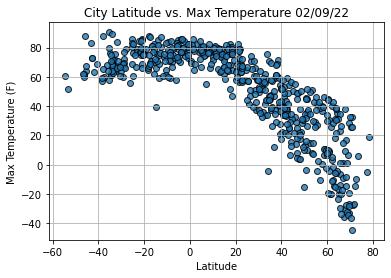

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

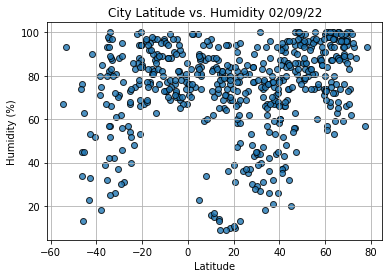

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

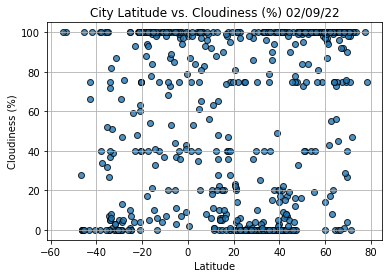

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

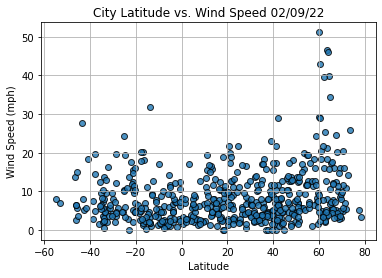

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

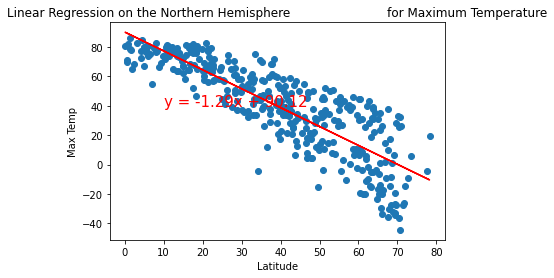

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

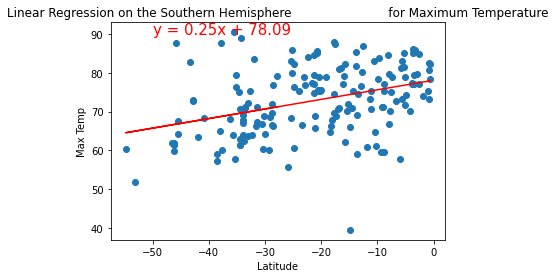

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

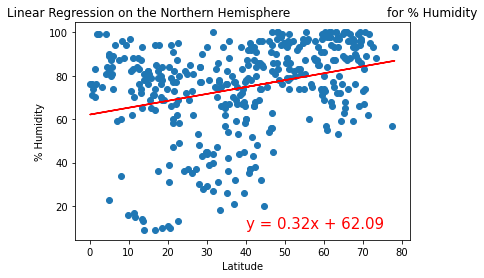

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

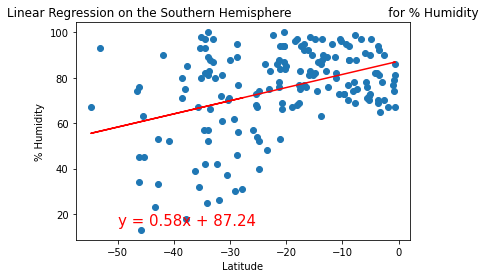

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

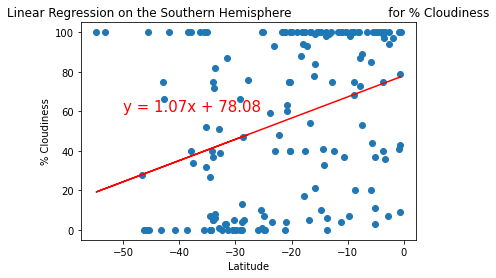

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

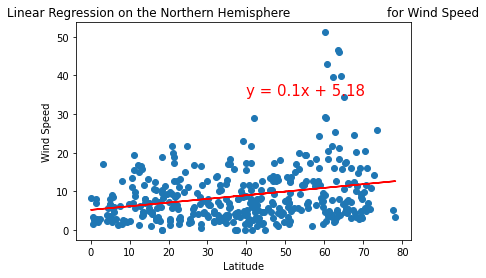

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

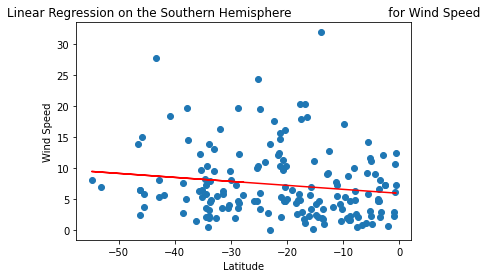

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [5]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [6]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Santiago Del Estero,76,AR,2022-02-08 01:09:26,31,-27.7951,-64.2615,79.14,5.66
1,1,Bredasdorp,7,ZA,2022-02-08 01:09:26,97,-34.5322,20.0403,61.29,3.53
2,2,Mataura,0,NZ,2022-02-08 01:09:26,34,-46.1927,168.8643,61.48,2.48
3,3,Sioux Lookout,95,CA,2022-02-08 01:09:27,94,50.1001,-91.9170,13.82,7.54
4,4,Coihaique,100,CL,2022-02-08 01:08:21,63,-45.5752,-72.0662,64.35,5.75


In [7]:
# Get the data types
city_data_df.dtypes


City_ID         int64
City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [8]:
%matplotlib inline

In [9]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [10]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [11]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))